<a href="https://colab.research.google.com/github/rxhit4/Rainfall-Prediction-using-ML/blob/main/Rainfall_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE REQUIRED DEPENDENCIES**

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample #to manage class imbalance
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

DATA COLLECTION AND PROCESSING

In [161]:
data = pd.read_csv('/content/Rainfall.csv') #load data set into pandas dataframe

In [162]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [163]:
data.shape

(366, 12)

In [164]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [165]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [166]:
data.info() #INFORMATION ABOUT THE DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [167]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [168]:
data.columns = data.columns.str.strip() #REMOVING EXTRA WHITE SPACES

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [170]:
data = data.drop('day', axis = 1) #REMOVING AN IRRELEVANT COLUMNS

In [171]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [172]:
#CHECKING MISSING VALUES
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [173]:
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [174]:
data['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [175]:
#HANDLING MISSING VALUES IN WINDDIRECTION AND WINDSPEED
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [176]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [177]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [178]:
#Convertind Yes and No to numerical values (1 & 0)
data['rainfall'] = data['rainfall'].map({'yes': 1, 'no': 0})

In [179]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [180]:
data.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,0,5.7,20.0,23.3


EXPLORATORY DATA ANALYSIS (EDA)

In [181]:
data.shape

(366, 11)

In [182]:
#setting plot style for every plot
sns.set(style = 'whitegrid')

In [183]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [184]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

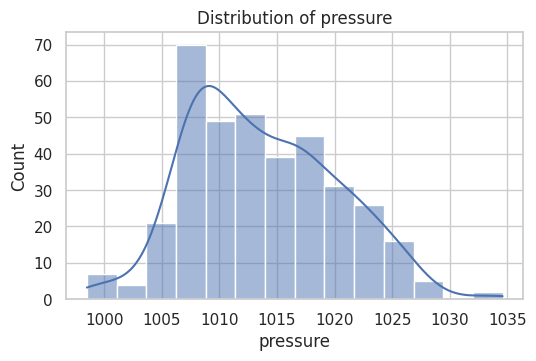

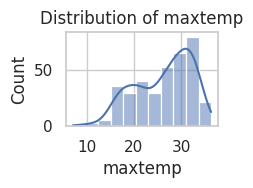

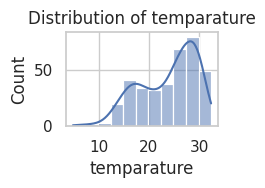

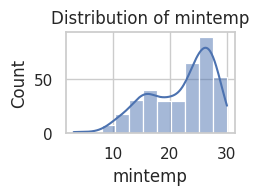

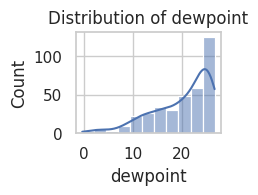

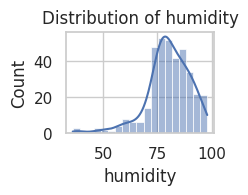

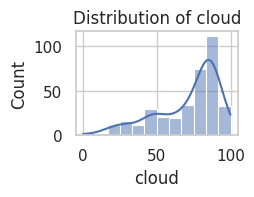

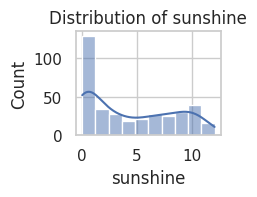

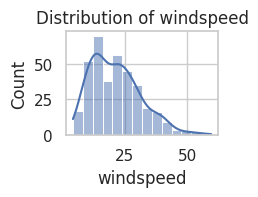

In [185]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
     plt.subplot(3, 3, i)
     sns.histplot(data[column], kde = True)
     plt.title(f'Distribution of {column}')

     plt.tight_layout()
     plt.show()

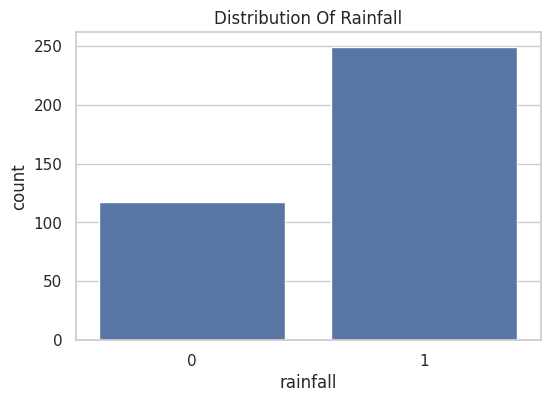

In [186]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'rainfall', data = data)
plt.title('Distribution Of Rainfall')
plt.show()

**CLASS DISTRIBUTION IMBALANCE IS DETECTED** ⏫


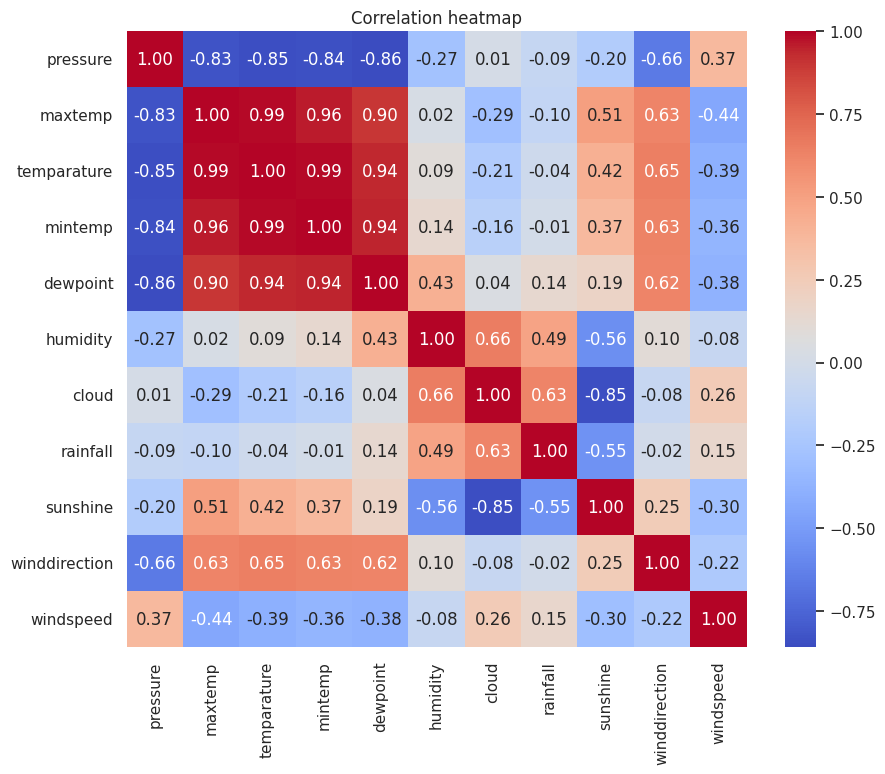

In [187]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm", fmt = '.2f')
plt.title("Correlation heatmap")
plt.show()

**Issue of "Multicollinearity" is Found ⏫**

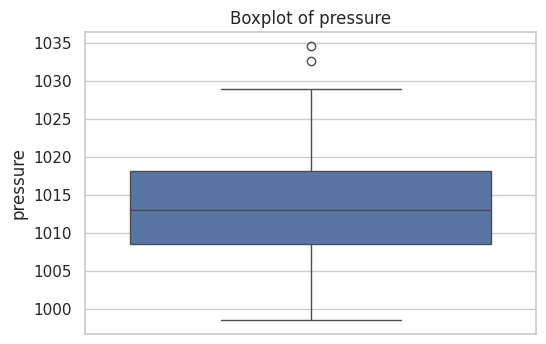

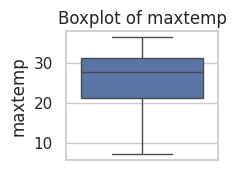

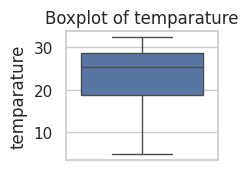

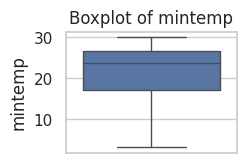

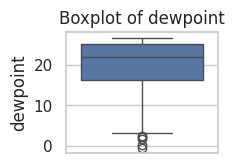

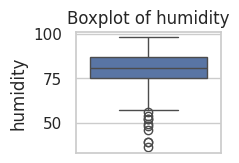

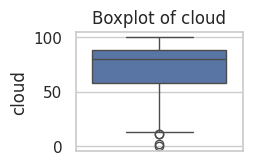

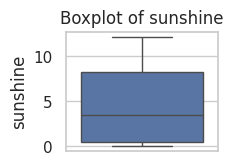

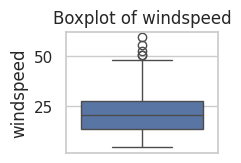

In [188]:
#BOXPLOT TO CHECK OUTLIERS
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
     plt.subplot(3, 3, i)
     sns.boxplot(data[column])
     plt.title(f'Boxplot of {column}')

     plt.tight_layout()
     plt.show()

***DATA PREPROCESSING***

In [189]:
#Drop the highly correlated columns
data = data.drop(columns = ['maxtemp', 'mintemp'])
data.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,18.9,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,19.3,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,20.6,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,20.7,19.9,95,81,1,0.0,40.0,13.7


In [190]:
data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [191]:
#Separate Majority and Minority Class
df_majority = data[data['rainfall'] == 1]
df_minority = data[data['rainfall'] == 0]

In [192]:
df_majority.shape


(249, 9)

In [193]:
df_minority.shape

(117, 9)

In [194]:
#DOWNSAMPLE MAJORITY CLASS TO MATCH MINORITY CLASS COUNT
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority), random_state = 42)

In [195]:
df_majority_downsampled.shape

(117, 9)

In [196]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [197]:
df_downsampled.shape

(234, 9)

In [198]:
df_downsampled.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,30.2,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,18.0,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,23.7,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,20.0,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,26.2,24.7,91,80,1,2.2,20.0,11.2


In [199]:
#SHUFFLING THE FINAL DATAFRAME
df_downsampled = df_downsampled.sample(frac=1, random_state= 42).reset_index(drop = True)

In [200]:
df_downsampled.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,18.0,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,26.2,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,29.6,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,27.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,14.8,8.4,66,18,0,10.1,20.0,24.4


In [201]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [202]:
#SPLIT FEATURES AND TARGETS AS X AND Y
X = df_downsampled.drop('rainfall', axis = 1)
Y = df_downsampled['rainfall']

In [203]:
#SPLITTING DATA INTO TRAINING DATA AND TEST DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 42)


MODEL TRAINING

In [204]:
rf_model = RandomForestClassifier(random_state = 42)
param_grid_rf = {'n_estimators': [50,100,200],
                 'max_features': ['sqrt','log2'],
                 'max_depth' : [None, 10, 20, 30],
                 'min_samples_split': [2,5,10],
                 'min_samples_leaf': [1,2,4]
}

In [205]:
#HyperParameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [206]:
best_rf_model = grid_search_rf.best_estimator_
print('Best Parameters for Random Forest:',grid_search_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


MODEL EVALUATION

In [207]:
cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv = 5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.68421053 0.86842105 0.89189189 0.86486486 0.86486486]
Mean CV Score: 0.8348506401137981


In [208]:
#TEST SET PERFORMANCE
y_pred = best_rf_model.predict(X_test)

print("1. Test set Accuracy:\n", accuracy_score(Y_test, y_pred))
print("2. Test set Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("3. Classification Report:\n", classification_report(Y_test, y_pred))

1. Test set Accuracy:
 0.7659574468085106
2. Test set Confusion Matrix:
 [[17  7]
 [ 4 19]]
3. Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.73      0.83      0.78        23

    accuracy                           0.77        47
   macro avg       0.77      0.77      0.77        47
weighted avg       0.77      0.77      0.77        47



In [209]:
df_downsampled.tail()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
229,1008.1,28.1,25.4,86,75,1,5.7,20.0,9.5
230,1010.1,21.5,19.9,91,89,1,0.0,70.0,31.8
231,1020.6,16.1,14.7,91,88,1,0.3,50.0,24.4
232,1008.3,29.4,24.1,74,29,0,5.7,10.0,4.4
233,1005.0,28.6,26.1,87,82,1,2.2,160.0,12.6


PREDICTION ON UNKNOWN DATA

In [210]:
input_data = (1008.6, 25.5, 20.6, 75, 62, 8.8, 80, 26)
input_df = pd.DataFrame([input_data], columns = ['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])
prediction = best_rf_model.predict(input_df)
print('Prediction result:', "Rainfall is expected" if prediction == 1 else "Rainfall is NOT expected")

Prediction result: Rainfall is NOT expected


SAVING THE TRAINED MODEL

In [211]:
import pickle


In [212]:
filename = 'trained_model.sav'
pickle.dump(best_rf_model, open(filename, 'wb'))


LOADING THE SAVED MODEL

In [213]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [214]:
input_data = (1008.6, 25.5, 20.6, 75, 62, 8.8, 80, 26)
input_df = pd.DataFrame([input_data], columns = ['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])
prediction = loaded_model.predict(input_df)
print('Prediction result:', "Rainfall is expected" if prediction == 1 else "Rainfall is NOT expected")

Prediction result: Rainfall is NOT expected
